# Linear Regression 
- Aim : Predict canada's per capita income in year 2020. build a regression model and predict the per capita income for canadian citizens in year 2020

### Importing

In [1]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# statitics
from scipy.stats import skew, kurtosis
from scipy.stats import zscore

In [3]:
# ml imports
from sklearn import linear_model

In [4]:
data = pd.read_csv('/home/jo/Desktop/deploy/canada_per_capita_income.csv')

In [5]:
df = data.copy()

## Exploritary Data Analysis

#### Non - Graphical EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [7]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [8]:
df = df
column = 'per capita income (US$)'
SimpleStats = pd.DataFrame({'Statistics':['Mean','Median','Mode','Min','Max','Range','Variance','Standard deviation','Skewness','Kurtosis'],
                           'Values':[df[column].mean(),df[column].median(),df[column].mode()[0],
                                     df[column].min(),df[column].max(),
                                     df[column].max() - df[column].min(),df[column].var(),
                                     df[column].std(),skew(df[column]),kurtosis(df[column])
                                    ]})
SimpleStats

,Statistics,Values
0,Mean,1.892014e+04
1,Median,1.642673e+04
2,Mode,3.399299e+03
3,Min,3.399299e+03
4,Max,4.267647e+04
5,Range,3.927717e+04
6,Variance,1.448335e+08
7,Standard deviation,1.203468e+04
8,Skewness,6.880137e-01
9,Kurtosis,-7.602901e-01


In [9]:
df = df
column = 'year'
SimpleStats = pd.DataFrame({'Statistics':['Mean','Median','Mode','Min','Max','Range','Variance','Standard deviation','Skewness','Kurtosis'],
                           'Values':[df[column].mean(),df[column].median(),df[column].mode()[0],
                                     df[column].min(),df[column].max(),
                                     df[column].max() - df[column].min(),df[column].var(),
                                     df[column].std(),skew(df[column]),kurtosis(df[column])
                                    ]})
SimpleStats

,Statistics,Values
0,Mean,1993.000000
1,Median,1993.000000
2,Mode,1970.000000
3,Min,1970.000000
4,Max,2016.000000
5,Range,46.000000
6,Variance,188.000000
7,Standard deviation,13.711309
8,Skewness,0.000000
9,Kurtosis,-1.201087


#### Grapical EDA

<Axes: ylabel='year'>

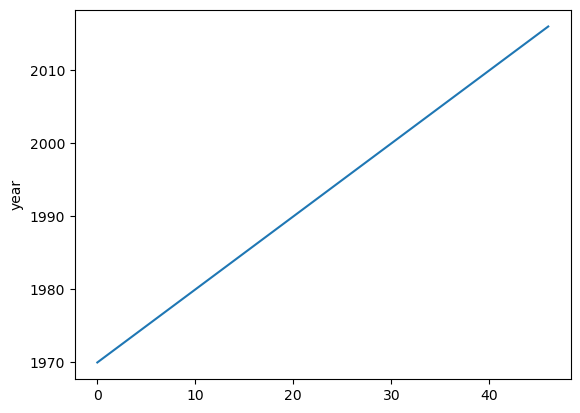

In [10]:
sns.lineplot(df['year'])

<Axes: ylabel='per capita income (US$)'>

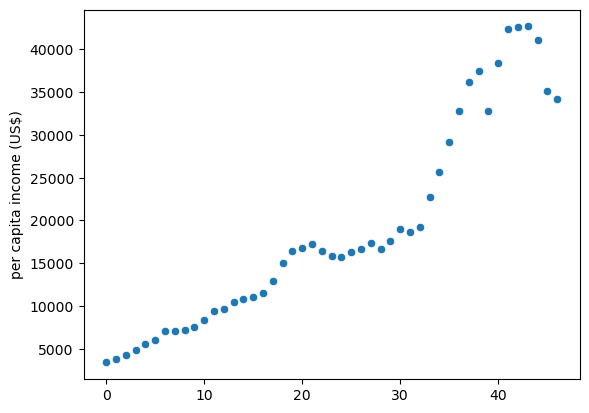

In [11]:
sns.scatterplot(df['per capita income (US$)'])

#####  kdeplot function in the seaborn library is used to plot a kernel density estimate (KDE), which is a non-parametric way to estimate the probability density function (PDF) of a continuous random variable.
##### Probability density function (PDF) value at a specific point on a continuous distribution. The PDF represents the relative likelihood of a random variable taking on a particular value.

<Axes: xlabel='year', ylabel='Density'>

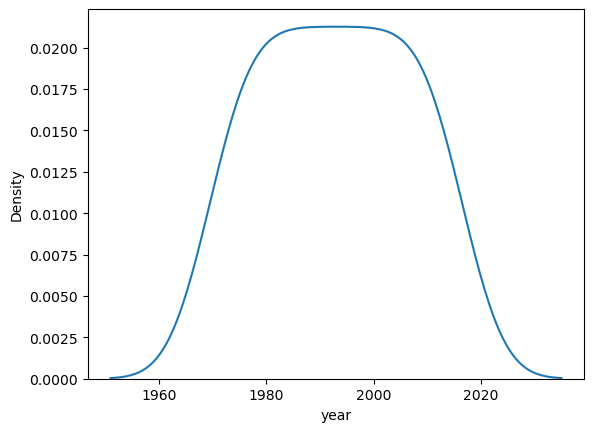

In [12]:
sns.kdeplot(df['year'])

##### The bell curve, also known as the normal distribution or Gaussian distribution, is a probability distribution that is symmetric and bell-shaped. It is characterized by the following characteristics:
- Symmetry: The bell curve is symmetric around its mean, which means that the left and right halves of the curve are mirror images of each other.
- Unimodal: The bell curve has a single peak, representing the mean or average value of the distribution.
- Mean and Median: The mean, median, and mode of a bell curve are all equal and located at the center of the distribution.
- Standard Deviation: The spread or dispersion of the data is determined by the standard deviation. The standard deviation controls the width of the curve, with larger standard deviations resulting in wider curves.
- Empirical Rule: The bell curve follows the empirical rule, also known as the 68-95-99.7 rule. According to this rule, approximately 68% of the data falls within one standard deviation of the mean, about 95% falls within two standard deviations, and around 99.7% falls within three standard deviations.
- Asymptotic: The tails of the bell curve approach but never touch the x-axis. This means that extreme values are less likely to occur as they move further away from the mean.

<Axes: xlabel='per capita income (US$)', ylabel='Density'>

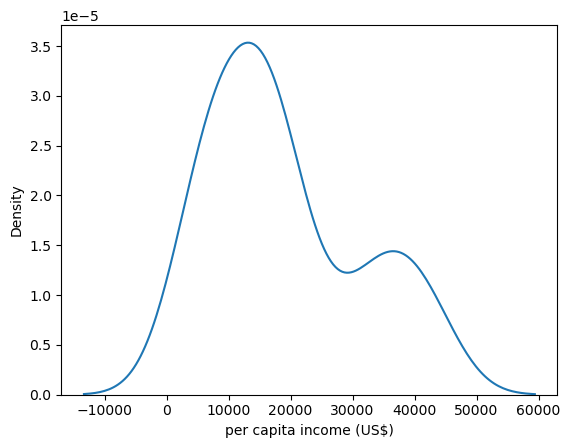

In [13]:
sns.kdeplot(df['per capita income (US$)'])


##### A bimodal curve refers to a distribution or curve that has two distinct peaks or modes. Here are some characteristics of a bimodal curve:
- Two Peaks: A bimodal curve has two prominent peaks, indicating the presence of two distinct groups or subpopulations within the data.
- Symmetry or Asymmetry: The two peaks in a bimodal curve can be symmetric, meaning they are roughly equal in height and shape, or they can be asymmetric, with one peak being higher or wider than the other.
- Separation: The two peaks in a bimodal curve are typically well-separated, indicating a clear distinction between the two groups or subpopulations.
- Tails: Bimodal curves often have tails on either side of the peaks, which represent the data points that deviate from the main modes.
- Skewness: The skewness of a bimodal curve can vary. It can be positively skewed, where one peak is higher and narrower than the other, or negatively skewed, where one peak is lower and wider than the other.
- Multimodality: Bimodal curves are a specific case of multimodal distributions, which can have more than two peaks. Bimodal distributions are the simplest form of multimodal distributions.

<Axes: >

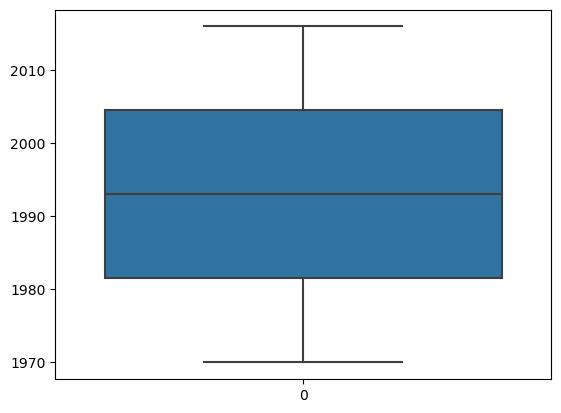

In [14]:
sns.boxplot(df['year'])

<Axes: >

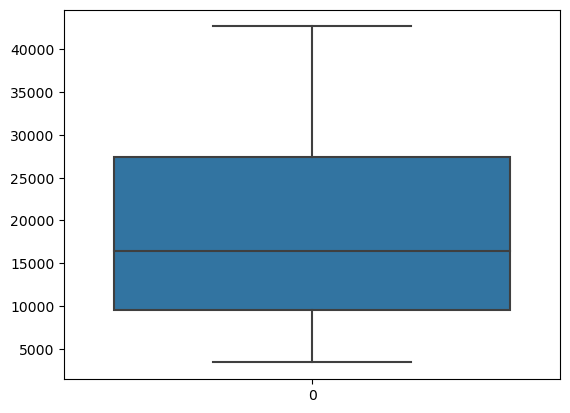

In [15]:
sns.boxplot(df['per capita income (US$)'])

<Axes: xlabel='year', ylabel='per capita income (US$)'>

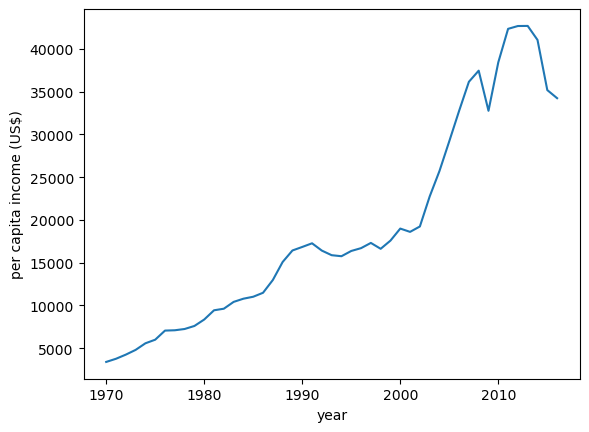

In [16]:

sns.lineplot(data=df,x='year',y='per capita income (US$)')

### Basic Prediction

#### Splitting Data

In [17]:
array = np.array(df['year'])
reshaped_array = array.reshape(-1, 1)

In [18]:
X = reshaped_array
y = df['per capita income (US$)']

#### Creating Model

In [19]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

#### Predicting Data

In [20]:
model.predict([[2020]])

array([41288.69409442])

In [21]:
model.predict([[2019]])

array([40460.22901919])

In [22]:
model.predict([[2021]])

array([42117.15916964])

### Split Prediction Model

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
clf = LinearRegression()

In [35]:
clf.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
y_pred

array([21168749.15295114, 20979625.64678746, 20811515.86353085,
       21158242.29149761, 20758981.55626316])

In [38]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.897494943743443


In [40]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))